# 🏠 Simple Missing Data Lab - Ames Housing Dataset

**What we'll do:**
1. Load data and see what's missing
2. Fill missing numbers with average values
3. Fill missing text with most common values
4. Save our clean data

**Why this matters:** Real data is messy! We need to handle missing values before analyzing or building models.

## Step 1: Import what we need

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Show more columns when we print data
pd.set_option("display.max_columns", 50)

## Step 2: Load the data

In [2]:
# Load the housing data
df = pd.read_csv("Ames_outliers_removed.csv")

print(f"Our data has {df.shape[0]} houses and {df.shape[1]} features")
print("\nFirst 5 rows:")
df.head()

Our data has 2927 houses and 81 features

First 5 rows:


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,...,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,...,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,...,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Step 3: Find missing values

In [3]:
# Count missing values in each column
missing_data = df.isnull().sum()

# Only show columns that have missing values
missing_data = missing_data[missing_data > 0]
missing_data = missing_data.sort_values(ascending=False)

print("Columns with missing values:")
print(missing_data)

Columns with missing values:
Pool QC           2915
Misc Feature      2822
Alley             2729
Fence             2355
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


## Step 4: Visualize missing data

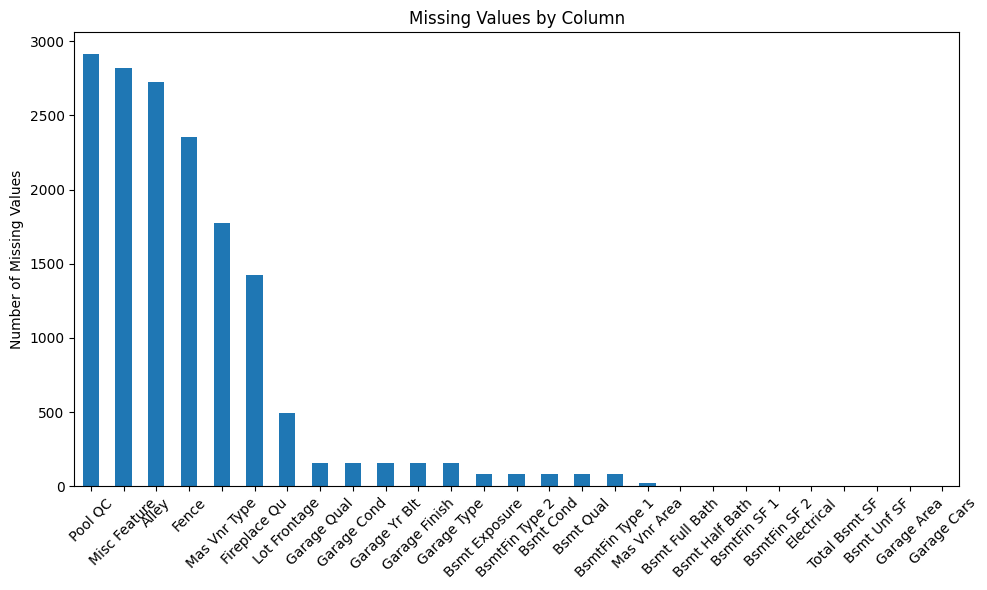

In [4]:
# Make a simple bar chart of missing values
if len(missing_data) > 0:
    plt.figure(figsize=(10, 6))
    missing_data.plot(kind='bar')
    plt.title("Missing Values by Column")
    plt.ylabel("Number of Missing Values")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Great! No missing values found.")

## Step 5: Separate numbers from text

In [5]:
# Find columns with numbers
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Find columns with text
text_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Number columns: {len(numeric_columns)}")
print(f"Text columns: {len(text_columns)}")

Number columns: 38
Text columns: 43


## Step 6: Fix missing numbers (use median)

In [6]:
# Create a copy to work with
df_clean = df.copy()

# Fix missing numbers by filling with median (middle value)
if len(numeric_columns) > 0:
    number_fixer = SimpleImputer(strategy='median')
    df_clean[numeric_columns] = number_fixer.fit_transform(df_clean[numeric_columns])
    print("✅ Fixed missing numbers")
else:
    print("No numeric columns to fix")

✅ Fixed missing numbers


## Step 7: Fix missing text (use most common value)

In [7]:
# Fix missing text by filling with most common value
if len(text_columns) > 0:
    text_fixer = SimpleImputer(strategy='most_frequent')
    df_clean[text_columns] = text_fixer.fit_transform(df_clean[text_columns])
    print("✅ Fixed missing text")
else:
    print("No text columns to fix")

✅ Fixed missing text


## Step 8: Check our work

In [8]:
# Count missing values before and after
before = df.isnull().sum().sum()
after = df_clean.isnull().sum().sum()

print(f"Missing values before: {before}")
print(f"Missing values after: {after}")
print(f"We fixed {before - after} missing values! 🎉")

Missing values before: 15739
Missing values after: 0
We fixed 15739 missing values! 🎉


## Step 9: Save our clean data

In [9]:
# Save the clean data to a new file
df_clean.to_csv("Ames_housing_clean.csv", index=False)
print("✅ Saved clean data as 'Ames_housing_clean.csv'")
print(f"Clean data shape: {df_clean.shape}")

✅ Saved clean data as 'Ames_housing_clean.csv'
Clean data shape: (2927, 81)


## 🎯 Summary

**What we did:**
1. ✅ Loaded housing data and found missing values
2. ✅ Fixed missing numbers with median values  
3. ✅ Fixed missing text with most common values
4. ✅ Saved our clean dataset

**Key takeaways:**
- Real data always has missing values
- Median is good for numbers (not affected by extreme values)
- Most frequent is simple for text data
- Always check your work!

**Next steps:** Use your clean data for analysis or machine learning! 🚀